Test where |ψ⟩ = 1
√2 (|00⟩ + |11⟩) violates the CHSH inequality |⟨S1⟩| ≤ 2 for θ ∈ (0, 2π) with a reasonable
discretization.
S1 = A(B + B′) − A′(B − B′) = AB + AB′ − A′B + A′B′
|⟨S1⟩| = |⟨AB⟩ + ⟨AB′⟩ − ⟨A′B⟩ + ⟨A′B′⟩| ≤ 2
Create a plot where you plot |⟨S1(θ)⟩| with θ on the x-axis and |⟨S1⟩| on the y-axis.


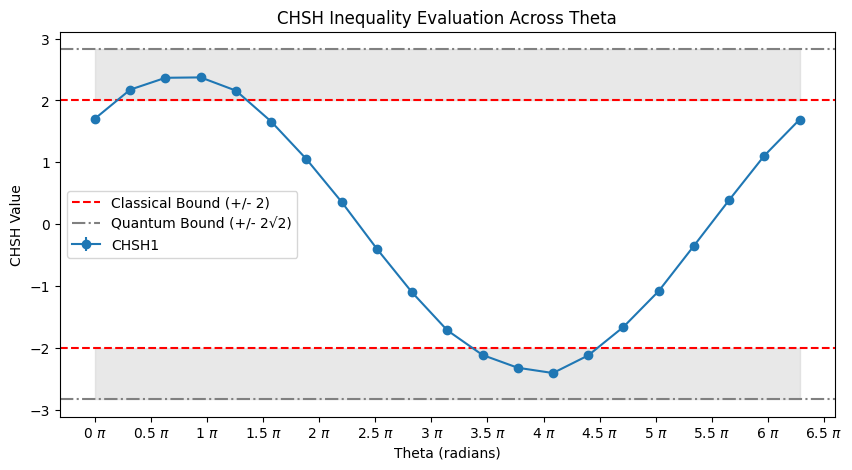

In [15]:
from matplotlib import pyplot as plt
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime.fake_provider import FakeQuitoV2
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
import matplotlib.ticker as tck


theta = Parameter("θ")

chsh_circuit = QuantumCircuit(2)
chsh_circuit.h(0)
chsh_circuit.cx(0, 1)
chsh_circuit.ry(theta, 1)
observable = SparsePauliOp.from_list([("ZZ", 1), ("ZX", -1), ("XZ", 1), ("XX", 1)])

backend = FakeQuitoV2()

theta_values = np.linspace(0, 2 * np.pi, 21)
individual_phases = [[values] for values in theta_values]

pm = generate_preset_pass_manager(target=backend.target, optimization_level=3)
chsh_isa_circuit = pm.run(chsh_circuit)

isa_observable = observable.apply_layout(layout=chsh_isa_circuit.layout)

estimator = Estimator(backend=backend)

pub = (chsh_isa_circuit, isa_observable, individual_phases)

results = estimator.run(pubs=[pub]).result()

expectation_values = results[0].data.evs
standard_deviations = results[0].data.stds


plt.figure(figsize=(10, 5))
plt.errorbar(
    theta_values,
    expectation_values,
    yerr=standard_deviations,
    fmt="o-",
    label="CHSH1",
    zorder=3,
)

plt.axhline(2, color="red", linestyle="--", label="Classical Bound (+/- 2)")
plt.axhline(-2, color="red", linestyle="--")
plt.axhline(
    np.sqrt(2) * 2, color="grey", linestyle="-.", label="Quantum Bound (+/- 2√2)"
)
plt.axhline(-np.sqrt(2) * 2, color="grey", linestyle="-.")

plt.fill_between(theta_values, 2, np.sqrt(2) * 2, color="lightgray", alpha=0.5)
plt.fill_between(theta_values, -2, -np.sqrt(2) * 2, color="lightgray", alpha=0.5)

plt.gca().xaxis.set_major_formatter(tck.FormatStrFormatter("%g $\\pi$"))
plt.gca().xaxis.set_major_locator(tck.MultipleLocator(base=0.5))

plt.xlabel("Theta (radians)")
plt.ylabel("CHSH Value")
plt.title("CHSH Inequality Evaluation Across Theta")
plt.legend()
plt.show()

|ψ⟩ does not violate |⟨S1(θ)⟩| ≤ 2 for all θ ∈ (0, 2π). Find a S2 that violates |⟨S2(θ)⟩| ≤ 2 for those θ where S1
isn’t violated.
Hint: How can the signs of equation 1 be rearranged so that it is still equal to ±2 in the classical case?


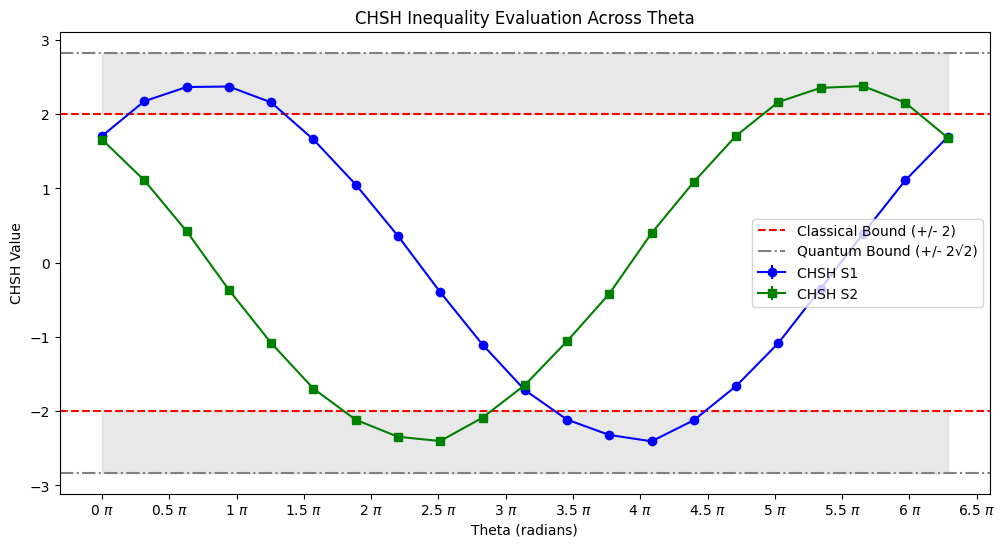

In [17]:
observableS2 = SparsePauliOp.from_list([("ZZ", 1), ("ZX", 1), ("XZ", -1), ("XX", 1)])

isa_observable_S2 = observableS2.apply_layout(layout=chsh_isa_circuit.layout)
pub_S2 = (chsh_isa_circuit, isa_observable_S2, individual_phases)
results_S2 = estimator.run(pubs=[pub_S2]).result()

expectation_values_S2 = results_S2[0].data.evs
standard_deviations_S2 = results_S2[0].data.stds

plt.figure(figsize=(12, 6))
plt.errorbar(
    theta_values,
    expectation_values,
    yerr=standard_deviations,
    fmt="o-",
    label="CHSH S1",
    color="blue",
)
plt.errorbar(
    theta_values,
    expectation_values_S2,
    yerr=standard_deviations_S2,
    fmt="s-",
    label="CHSH S2",
    color="green",
)
plt.axhline(2, color="red", linestyle="--", label="Classical Bound (+/- 2)")
plt.axhline(-2, color="red", linestyle="--")
plt.axhline(
    np.sqrt(2) * 2, color="grey", linestyle="-.", label="Quantum Bound (+/- 2√2)"
)
plt.axhline(-np.sqrt(2) * 2, color="grey", linestyle="-.")
plt.fill_between(theta_values, 2, np.sqrt(2) * 2, color="lightgray", alpha=0.5)
plt.fill_between(theta_values, -2, -np.sqrt(2) * 2, color="lightgray", alpha=0.5)
plt.gca().xaxis.set_major_formatter(tck.FormatStrFormatter("%g $\\pi$"))
plt.gca().xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
plt.xlabel("Theta (radians)")
plt.ylabel("CHSH Value")
plt.title("CHSH Inequality Evaluation Across Theta")
plt.legend()
plt.show()

5.2 a)


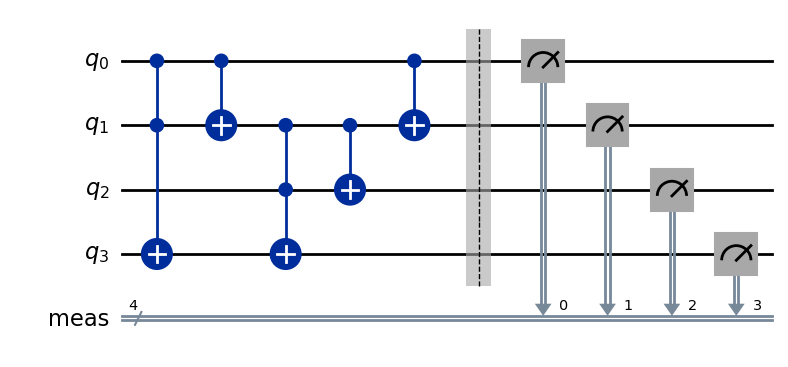

In [35]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(4)

qc=QuantumCircuit(4)
qc.ccx(0,1,3)
qc.cx(0,1)
qc.ccx(1,2,3)
qc.cx(1,2)
qc.cx(0,1)
qc.measure_all()

qc.draw(output='mpl')

b)


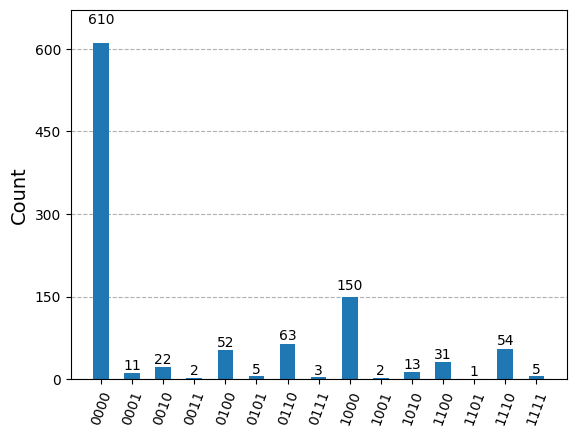

In [37]:
from qiskit_ibm_runtime.fake_provider import FakeQuitoV2
from qiskit.visualization import plot_histogram
from qiskit import transpile

simulator = FakeQuitoV2()

transpiled_qc = transpile(qc, simulator)

job = simulator.run(transpiled_qc, shots=1024)
result = job.result()

counts = result.get_counts()

plot_histogram(counts)

c)


In [39]:
def create_full_adder():
    qc=QuantumCircuit(4)
    qc.ccx(0,1,3)
    qc.cx(0,1)
    qc.ccx(1,2,3)
    qc.cx(1,2)
    qc.cx(0,1)
    qc.measure_all()
    return qc


for a in [0, 1]:
    for b in [0, 1]:
        for cin in [0, 1]:
            qc = create_full_adder()
            if a == 1:
                qc.x(0)
            if b == 1:
                qc.x(1)
            if cin == 1:
                qc.x(2)
            qc = transpile(qc, simulator)
            job = simulator.run(qc, shots=1)
            result = job.result()
            counts = result.get_counts(qc)
            print(f"Input: {a}{b}{cin}, Output: {counts}")

Input: 000, Output: {'0000': 1}
Input: 001, Output: {'0100': 1}
Input: 010, Output: {'1000': 1}
Input: 011, Output: {'1000': 1}
Input: 100, Output: {'0000': 1}
Input: 101, Output: {'0000': 1}
Input: 110, Output: {'0100': 1}
Input: 111, Output: {'1000': 1}


5.4 b)


In [42]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime.fake_provider import FakeKyoto
from qiskit import transpile


n = 12

qc = QuantumCircuit(n + 1, n)

for i in range(n):
    qc.h(i)

qc.x(n)
qc.h(n)

cnot_qubits = [1, 3, 4, 6, 7, 8, 10, 11]
for qubit in cnot_qubits:
    qc.cx(qubit, n)

for i in range(n):
    qc.h(i)


for i in range(n):
    qc.measure(i, i)

simulator = FakeKyoto()

transpiled_qc = transpile(qc, simulator)
job = simulator.run(transpiled_qc, shots=1024)
result = job.result()
counts = result.get_counts()

a = list(counts.keys())[0]

print("The hidden string a is:", a)


The hidden string a is: 010000001000
